In [3]:
import pandas as pd
import numpy as np
plt.rcParams.update({'font.family':'Malgun Gothic'})

In [4]:
gym = pd.read_csv('checkin_checkout_history_updated.csv', encoding='EUC-KR')
gym.head()

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049


In [5]:
#어떤 운동종목을 사람들이 가장 많이 했는지 오름차순으로 속성을 불러왔습니다.
gym1 = gym.query('gym_id =="gym_1"')
gym1['workout_type'].sort_values().value_counts()

workout_type
CrossFit         5072
Yoga             5007
Weightlifting    4986
Pilates          4981
Swimming         4972
Cardio           4934
Name: count, dtype: int64

In [6]:
gym1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29952 entries, 7 to 299991
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          29952 non-null  object
 1   gym_id           29952 non-null  object
 2   checkin_time     29952 non-null  object
 3   checkout_time    29952 non-null  object
 4   workout_type     29952 non-null  object
 5   calories_burned  29952 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [7]:
import pandas as pd
file_path = 'checkin_checkout_history_updated.csv' 
data = pd.read_csv(file_path)

# gym_1에서 Weightlifting 운동만 추출
gym_1_weightlifting = data[(data['gym_id'] == 'gym_1') & (data['workout_type'] == 'Weightlifting')]

print(gym_1_weightlifting)

# 결과를 CSV 파일로 저장
gym_1_weightlifting.to_csv('gym_1_weightlifting.csv', index=False)
gym_1_weightlifting.info()

          user_id gym_id         checkin_time        checkout_time  \
19      user_2225  gym_1  2023-04-09 08:31:00  2023-04-09 09:36:00   
42      user_2277  gym_1  2023-09-11 13:12:00  2023-09-11 15:10:00   
113     user_4994  gym_1  2023-01-16 19:44:00  2023-01-16 21:40:00   
165     user_2238  gym_1  2023-04-22 14:47:00  2023-04-22 15:47:00   
221      user_333  gym_1  2023-03-22 09:14:00  2023-03-22 10:31:00   
...           ...    ...                  ...                  ...   
299641  user_3445  gym_1  2023-03-27 15:25:00  2023-03-27 16:14:00   
299654  user_3961  gym_1  2023-04-19 19:32:00  2023-04-19 21:17:00   
299697  user_1111  gym_1  2023-02-17 19:34:00  2023-02-17 22:29:00   
299707   user_716  gym_1  2023-09-03 12:54:00  2023-09-03 14:06:00   
299796  user_4246  gym_1  2023-03-08 19:32:00  2023-03-08 20:22:00   

         workout_type  calories_burned  
19      Weightlifting              813  
42      Weightlifting             1254  
113     Weightlifting             11

In [8]:
#  운동별로 칼로리 소비량 평균을 불러왔습니다.
gym.groupby('workout_type',as_index=False).agg(mean_calories_burned=('calories_burned', 'mean'))


,workout_type,mean_calories_burned
0,Cardio,885.462109
1,CrossFit,886.250600
2,Pilates,884.525312
3,Swimming,887.662119
4,Weightlifting,887.135272
5,Yoga,885.482022


In [9]:
import pandas as pd
data = pd.read_csv('checkin_checkout_history_updated.csv', encoding='EUC-KR')
data['Checkin'] = pd.to_datetime(data['checkin_time'])  
data['Checkout'] = pd.to_datetime(data['checkout_time'])  
data['Workout_Duration'] = (data['Checkout'] - data['Checkin']).dt.total_seconds() / 60  # 분 단위로 변환

In [10]:

weight = data.query('workout_type=="Weightlifting"').copy()
weight['시간'] = np.where(
    weight['Workout_Duration'] > 150, '150초과',
    np.where(
        weight['Workout_Duration'] > 120, '121~150',
        np.where(
            weight['Workout_Duration'] > 90, '91~120',
            np.where(
                weight['Workout_Duration'] > 60, '61~90',
                np.where(weight['Workout_Duration'] > 30, '31~60','30')
            )
        )
    )
)
weight

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,Checkin,Checkout,Workout_Duration,시간
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462,2023-09-10 15:55:00,2023-09-10 16:34:00,39.0,31~60
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049,2023-02-21 06:20:00,2023-02-21 08:02:00,102.0,91~120
9,user_4797,gym_7,2023-02-15 19:37:00,2023-02-15 21:02:00,Weightlifting,713,2023-02-15 19:37:00,2023-02-15 21:02:00,85.0,61~90
19,user_2225,gym_1,2023-04-09 08:31:00,2023-04-09 09:36:00,Weightlifting,813,2023-04-09 08:31:00,2023-04-09 09:36:00,65.0,61~90
24,user_2521,gym_3,2023-07-12 10:31:00,2023-07-12 13:06:00,Weightlifting,1192,2023-07-12 10:31:00,2023-07-12 13:06:00,155.0,150초과
...,...,...,...,...,...,...,...,...,...,...
299970,user_4193,gym_8,2023-09-15 17:24:00,2023-09-15 20:19:00,Weightlifting,1039,2023-09-15 17:24:00,2023-09-15 20:19:00,175.0,150초과
299974,user_2471,gym_9,2023-03-11 09:25:00,2023-03-11 10:32:00,Weightlifting,911,2023-03-11 09:25:00,2023-03-11 10:32:00,67.0,61~90
299976,user_3043,gym_7,2023-06-24 20:19:00,2023-06-24 22:31:00,Weightlifting,737,2023-06-24 20:19:00,2023-06-24 22:31:00,132.0,121~150
299985,user_2865,gym_2,2023-10-08 11:30:00,2023-10-08 13:48:00,Weightlifting,1391,2023-10-08 11:30:00,2023-10-08 13:48:00,138.0,121~150


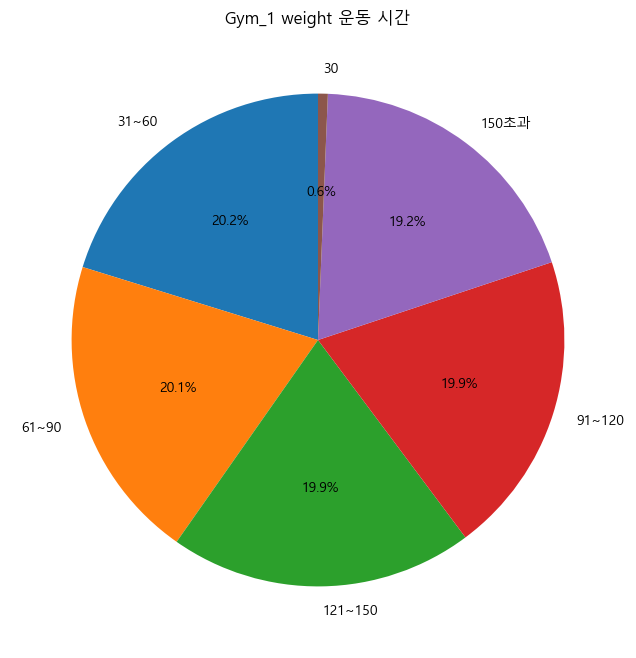

In [42]:
# 사람들의 근력운동 시간 비율을 그래프로 나타내봤습니다
import matplotlib.pyplot as plt
popular_workouts = weight['시간'].value_counts()
plt.figure(figsize=(8, 8))
popular_workouts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Gym_1 weight 운동 시간')
plt.ylabel('')
plt.show()


In [12]:
data['Workout_Duration'].describe()

count    300000.000000
mean        104.519627
std          43.216521
min          30.000000
25%          67.000000
50%         105.000000
75%         142.000000
max         179.000000
Name: Workout_Duration, dtype: float64

In [13]:
#gym1찾아오기 / 2시간 ± 10분 한 사람들만 출력
result = data.query('gym_id=="gym_1"&Workout_Duration>=110&Workout_Duration<=130')

In [14]:
result.reset_index(drop=True, inplace=True)

In [15]:
result

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,Checkin,Checkout,Workout_Duration
0,user_410,gym_1,2023-03-26 14:04:00,2023-03-26 16:03:00,Yoga,751,2023-03-26 14:04:00,2023-03-26 16:03:00,119.0
1,user_2277,gym_1,2023-09-11 13:12:00,2023-09-11 15:10:00,Weightlifting,1254,2023-09-11 13:12:00,2023-09-11 15:10:00,118.0
2,user_3408,gym_1,2023-03-05 06:56:00,2023-03-05 08:52:00,Cardio,587,2023-03-05 06:56:00,2023-03-05 08:52:00,116.0
3,user_4994,gym_1,2023-01-16 19:44:00,2023-01-16 21:40:00,Weightlifting,1132,2023-01-16 19:44:00,2023-01-16 21:40:00,116.0
4,user_3475,gym_1,2023-01-05 12:36:00,2023-01-05 14:31:00,Pilates,596,2023-01-05 12:36:00,2023-01-05 14:31:00,115.0
...,...,...,...,...,...,...,...,...,...
4165,user_470,gym_1,2023-07-20 20:55:00,2023-07-20 22:49:00,Pilates,1098,2023-07-20 20:55:00,2023-07-20 22:49:00,114.0
4166,user_3059,gym_1,2023-02-16 12:28:00,2023-02-16 14:30:00,Weightlifting,347,2023-02-16 12:28:00,2023-02-16 14:30:00,122.0
4167,user_4437,gym_1,2023-07-07 12:51:00,2023-07-07 14:51:00,Pilates,383,2023-07-07 12:51:00,2023-07-07 14:51:00,120.0
4168,user_898,gym_1,2023-01-19 11:47:00,2023-01-19 13:47:00,Swimming,673,2023-01-19 11:47:00,2023-01-19 13:47:00,120.0


In [16]:
a = result.groupby('workout_type', as_index = False).agg(mean_Cal=('calories_burned','mean'))
a

,workout_type,mean_Cal
0,Cardio,909.828854
1,CrossFit,877.173021
2,Pilates,886.689560
3,Swimming,895.490826
4,Weightlifting,874.229345
5,Yoga,862.840746


In [17]:
#인기 있는 종목 확인을 위해 종목별로 횟수를 가져왔습니다
popular_workouts = gym['workout_type'].value_counts().sort_values(ascending=True)
print("가장 인기 있는 운동 종목:\n", popular_workouts)

가장 인기 있는 운동 종목:
 workout_type
Cardio           49629
Yoga             49921
CrossFit         49976
Pilates          50035
Swimming         50133
Weightlifting    50306
Name: count, dtype: int64


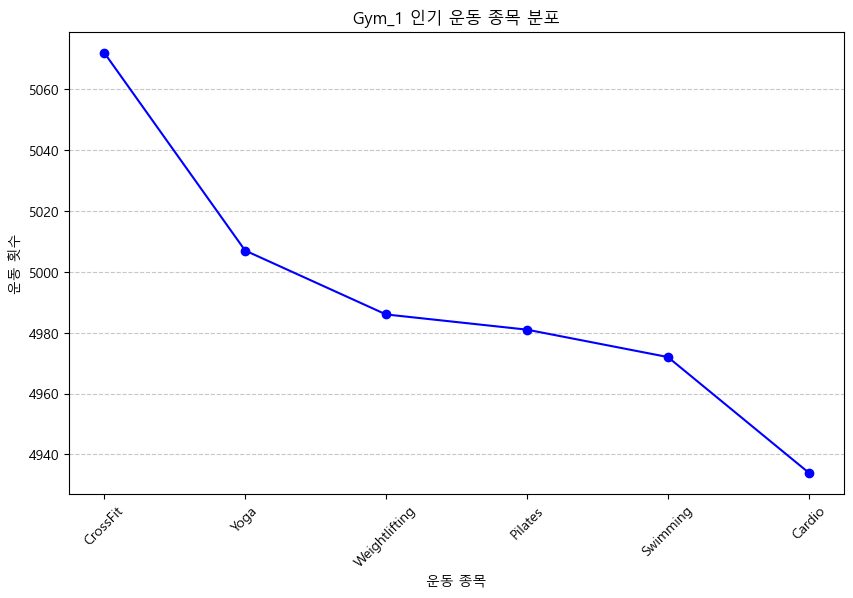

In [18]:
import matplotlib.pyplot as plt
popular_workouts = gym1['workout_type'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(popular_workouts.index, popular_workouts.values, marker='o', linestyle='-', color='b')
plt.title('Gym_1 인기 운동 종목 분포')
plt.xlabel('운동 종목')
plt.ylabel('운동 횟수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45) 
plt.show()


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sungh\AppData\Local\Temp\ipykernel_23392\2036582866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a, x='workout_type', y='mean_Cal', palette='coolwarm', edgecolor='black').set(ylim=800)


[(800.0, 955.3202970297029)]

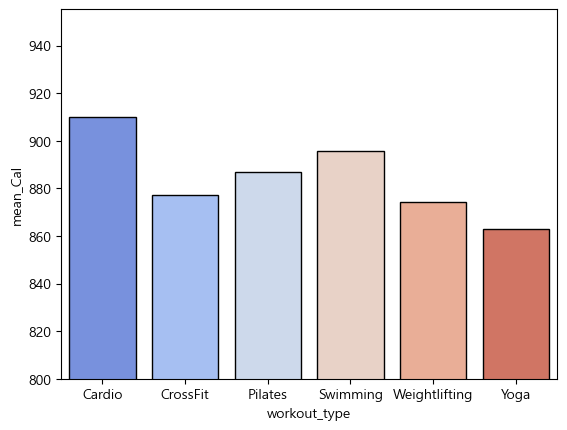

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# 운동 종목별로 평균 2시간 (±10분) 운동한 사람들의 칼로리 소모량의 평균을 막대 그래프로 표현 해봤습니다.
sns.barplot(data=a, x='workout_type', y='mean_Cal', palette='coolwarm', edgecolor='black').set(ylim=800)


In [21]:
# 이 결과로 Cardio(유산소)가 가장 많은 칼로리를 소모한 것을 볼 수 있으며 Yoga(요가)가 칼로리 소모에 가장 적었다는 것을 볼 수 있습니다.